<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_add_delta_1_6_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,1327.897212,1542.383951,159.916583,1382.467368
1,0.0,1.0,88.215495,94.604408,36.752253,379.099883,608.672038,147.243146,461.428892
2,0.0,2.0,75.723322,35.232029,46.417423,-257.849204,-90.476430,171.759203,-262.235633
3,0.0,3.0,38.055184,66.641168,96.212257,-2143.114082,-1932.205474,218.743260,-2150.948734
4,0.0,4.0,68.821230,68.543753,46.272811,-1301.890109,-1108.252314,164.565507,-1272.817821
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-934.720979,-755.963541,214.290920,-970.254461
249996,999.0,246.0,32.379447,24.201317,94.176224,-107.785759,52.971229,106.930373,-53.959145
249997,999.0,247.0,73.636953,77.707721,80.827540,1206.412619,1448.584833,64.446771,1384.138062
249998,999.0,248.0,96.730468,97.527144,33.411083,2296.646875,2534.315570,117.982174,2416.333396


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,1327.897212,1542.383951,159.916583,1382.467368
1,0.0,1.0,88.215495,94.604408,36.752253,379.099883,608.672038,147.243146,461.428892
2,0.0,2.0,75.723322,35.232029,46.417423,-257.849204,-90.476430,171.759203,-262.235633
3,0.0,3.0,38.055184,66.641168,96.212257,-2143.114082,-1932.205474,218.743260,-2150.948734
4,0.0,4.0,68.821230,68.543753,46.272811,-1301.890109,-1108.252314,164.565507,-1272.817821
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-934.720979,-755.963541,214.290920,-970.254461
249996,999.0,246.0,32.379447,24.201317,94.176224,-107.785759,52.971229,106.930373,-53.959145
249997,999.0,247.0,73.636953,77.707721,80.827540,1206.412619,1448.584833,64.446771,1384.138062
249998,999.0,248.0,96.730468,97.527144,33.411083,2296.646875,2534.315570,117.982174,2416.333396


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    57.585513  99.226585  ...  159.916583  1382.467368
      1.0    88.215495  94.604408  ...  147.243146   461.428892
      2.0    75.723322  35.232029  ...  171.759203  -262.235633
      3.0    38.055184  66.641168  ...  218.743260 -2150.948734
      4.0    68.821230  68.543753  ...  164.565507 -1272.817821
...                ...        ...  ...         ...          ...
999.0 245.0  82.142416  53.368686  ...  214.290920  -970.254461
      246.0  32.379447  24.201317  ...  106.930373   -53.959145
      247.0  73.636953  77.707721  ...   64.446771  1384.138062
      248.0  96.730468  97.527144  ...  117.982174  2416.333396
      249.0  92.431783  65.077315  ...  157.455286   390.907054

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    57.585513  99.226585  ...  159.916583  1382.467368
      1.0    88.215495  94.604408  ...  147.243146   461.428892
      2.0    75.723322  35.232029  ...  171.759203  -262.235633
      3.0    38.055184  66.641168  ...  218.743260 -2150.948734
      4.0    68.821230  68.543753  ...  164.565507 -1272.817821
...                ...        ...  ...         ...          ...
999.0 245.0  82.142416  53.368686  ...  214.290920  -970.254461
      246.0  32.379447  24.201317  ...  106.930373   -53.959145
      247.0  73.636953  77.707721  ...   64.446771  1384.138062
      248.0  96.730468  97.527144  ...  117.982174  2416.333396
      249.0  92.431783  65.077315  ...  157.455286   390.907054

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,1327.897212,1542.383951,159.916583,1382.467368
1,0.0,1.0,88.215495,94.604408,36.752253,379.099883,608.672038,147.243146,461.428892
2,0.0,2.0,75.723322,35.232029,46.417423,-257.849204,-90.476430,171.759203,-262.235633
3,0.0,3.0,38.055184,66.641168,96.212257,-2143.114082,-1932.205474,218.743260,-2150.948734
4,0.0,4.0,68.821230,68.543753,46.272811,-1301.890109,-1108.252314,164.565507,-1272.817821
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-934.720979,-755.963541,214.290920,-970.254461
249996,999.0,246.0,32.379447,24.201317,94.176224,-107.785759,52.971229,106.930373,-53.959145
249997,999.0,247.0,73.636953,77.707721,80.827540,1206.412619,1448.584833,64.446771,1384.138062
249998,999.0,248.0,96.730468,97.527144,33.411083,2296.646875,2534.315570,117.982174,2416.333396


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    57.585513  99.226585  ...  159.916583  1382.467368
      1.0    88.215495  94.604408  ...  147.243146   461.428892
      2.0    75.723322  35.232029  ...  171.759203  -262.235633
      3.0    38.055184  66.641168  ...  218.743260 -2150.948734
      4.0    68.821230  68.543753  ...  164.565507 -1272.817821
...                ...        ...  ...         ...          ...
999.0 245.0  82.142416  53.368686  ...  214.290920  -970.254461
      246.0  32.379447  24.201317  ...  106.930373   -53.959145
      247.0  73.636953  77.707721  ...   64.446771  1384.138062
      248.0  96.730468  97.527144  ...  117.982174  2416.333396
      249.0  92.431783  65.077315  ...  157.455286   390.907054

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

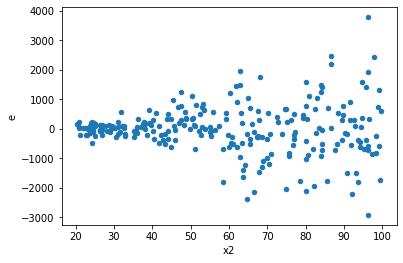

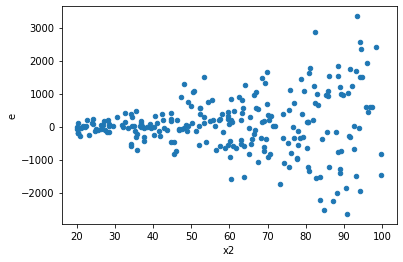

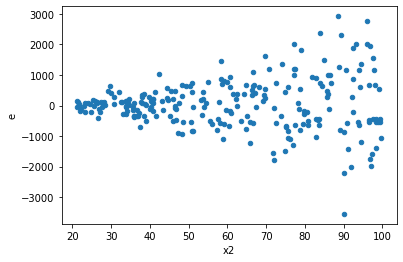

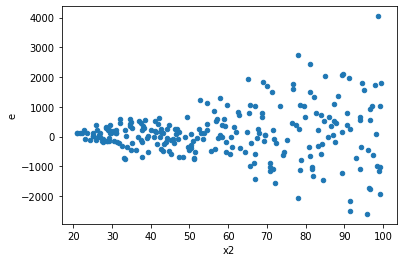

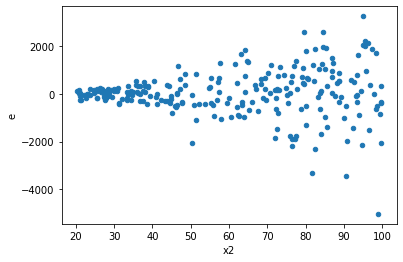

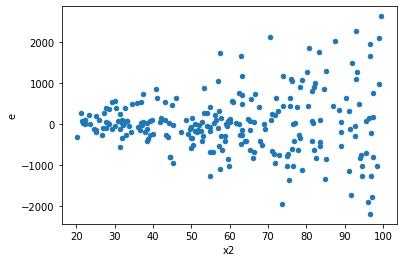

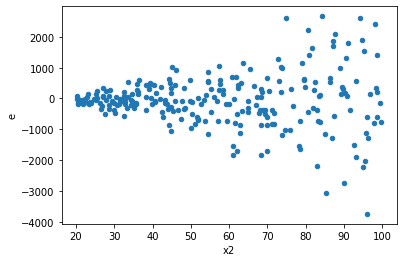

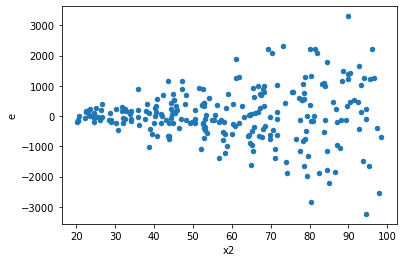

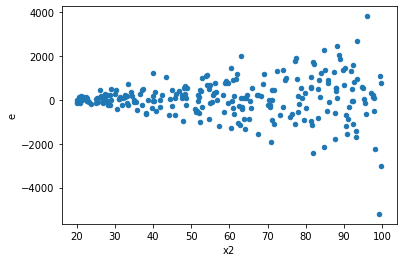

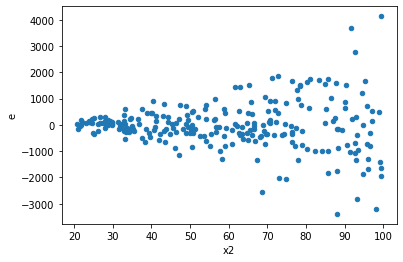

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,122578064.67146927,9785932.265720943,1276854.840327805,101936.79443459316,12.525946567282803,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,154926686.41151097,12879001.725693312,1613819.650119906,134156.267975972,12.029401789925675,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,138491068.43419614,10498224.483033698,1442615.296189543,109356.50503160102,13.191856266553756,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,148606541.08405071,8960614.372707095,1547984.8029588617,93339.73304903223,16.584414293810877,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,190839594.25786468,12411405.960145945,1987912.4401860905,129285.47875152026,15.376146334320742,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,101985941.80184458,9286505.354003185,1062353.5604358811,96734.43077086651,10.982165832476577,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,152553897.81178474,9860934.847931761,1589103.1022060912,102718.07133262251,15.470530955164103,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,150008811.06836763,15287548.90769938,1562591.7819621628,159245.30112186854,9.812482823379069,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,158212426.24549538,12039840.721708292,1648046.1067239102,125415.00751779471,13.140740804006846,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,122578064.67146927,9785932.265720943,1276854.840327805,101936.79443459316,12.525946567282803,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,154926686.41151097,12879001.725693312,1613819.650119906,134156.267975972,12.029401789925675,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,138491068.43419614,10498224.483033698,1442615.296189543,109356.50503160102,13.191856266553756,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,148606541.08405071,8960614.372707095,1547984.8029588617,93339.73304903223,16.584414293810877,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,190839594.25786468,12411405.960145945,1987912.4401860905,129285.47875152026,15.376146334320742,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,101985941.80184458,9286505.354003185,1062353.5604358811,96734.43077086651,10.982165832476577,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,152553897.81178474,9860934.847931761,1589103.1022060912,102718.07133262251,15.470530955164103,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,150008811.06836763,15287548.90769938,1562591.7819621628,159245.30112186854,9.812482823379069,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,158212426.24549538,12039840.721708292,1648046.1067239102,125415.00751779471,13.140740804006846,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64